<a href="https://colab.research.google.com/github/shruti2120/BIKE_SHARING_DEMAND_PREDICTION/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BIKE SHARING DEMAND PREDICTION**:-




#Introduction

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated with using network and locations throughout a city. Using these systems, people are able to take rent a  bike from a one location and return it to a different place on an as-needed basis. Currently, there are various bike-sharing programs around the world.

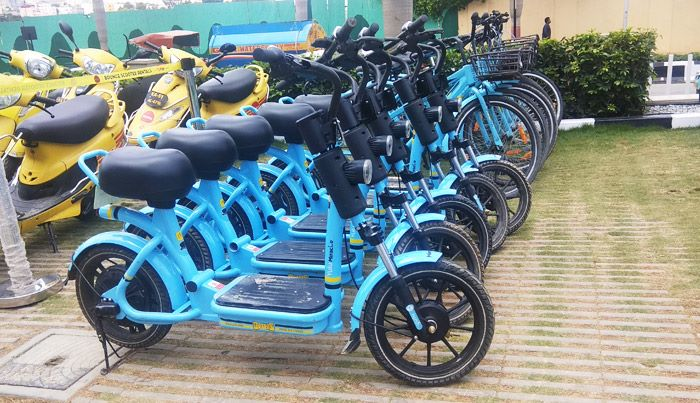

# Problem statement

The goal of this project is to combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.

Target Column to be predicted: COUNT- for each hour to be stable supply of rental bikes.

Input Columns used as variables .[Date ,Rented bike count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Season,Holiday,Functioning day]

In [77]:
#  Firstly Importing the libraries which is required to perform coding operations.
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [7]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Reading the comma seperated value file by using pandas operation. 
df= pd.read_csv('/content/drive/MyDrive/bike sharing demand prediction /SeoulBikeData.csv', encoding= 'unicode_escape')

In [9]:
# Let's take a first look at the Rented Bike demand 
# Firt 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
# Last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
# Illustrate the Information of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
# Here we describe the dataset which shows aggregated and percentagewise values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### *This Dataset contains 8760 lines and 14 columns.*
# *In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*

## Features description
# Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: Season of the year, type : str, there are only 4 season's in data .

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

In [13]:
# Mentioned the shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 8760 rows and 14 columns.


In [14]:
# Important columns names  which is included in dataset.

column=df.columns
column

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Checking the null values of data.

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

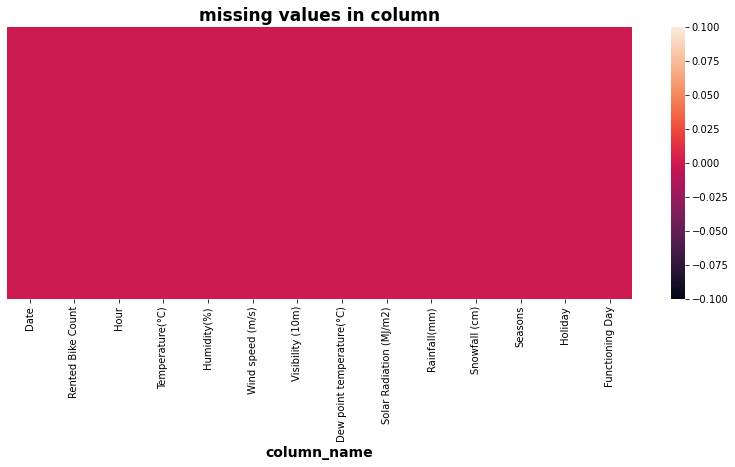

In [16]:
# Checking missing values using heatmap.

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

# **Here we don't have any missing values in our dataset.**

In [17]:
# Checking Duplicate Values

value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [18]:
# Extracting categorical features from dataset.

categorical_features= df.select_dtypes(include='object')
categorical_features

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


In [19]:
# Calculating value of counts of some features of dataset.

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [20]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [21]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [22]:
# Converting string format of 'Date' column into date-time format.

df['Date'] = pd.to_datetime(df['Date'])

In [23]:
# Creating a column containing the year from a particular date.

year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year


In [24]:
# Creating a column containing the month number from a particular date.

months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months



In [25]:
# Group by the data on the basis of rented bike count.

df_Date = df.groupby('Date').sum()['Rented Bike Count']
df_Date

Date
2017-01-12     9539
2017-02-12     8523
2017-03-12     7222
2017-04-12     8729
2017-05-12     8307
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Name: Rented Bike Count, Length: 365, dtype: int64

In [26]:
# Creating a series which shows total number of bikes rented on the type of day

df_holiday = df.groupby('Holiday').sum()['Rented Bike Count']
df_holiday

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [27]:
# Group by the data on the basis of seasons. 

season_by= df.groupby('Seasons').sum()
season_by

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b7550cc10>],
      dtype=object)

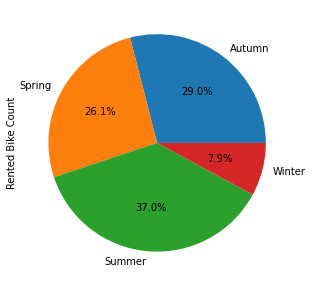

In [28]:
# Graphical representation of rented bike count along with seasons. 

season_by['Rented Bike Count'].plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5))

Text(0, 0.5, 'count')

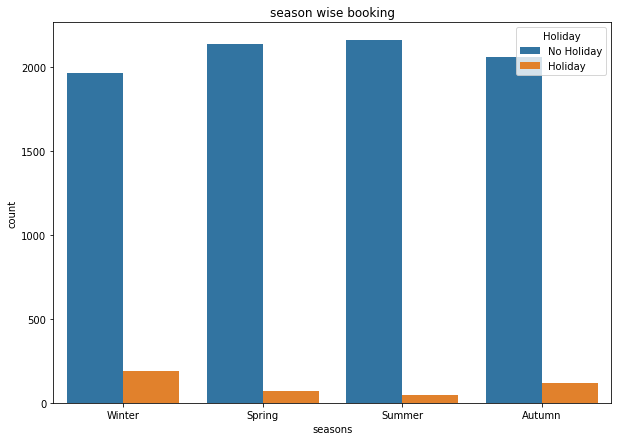

In [29]:
# Differentiation between holiday and working day on seasonal basis. 

plt.figure(figsize=(10,7))
sns.countplot(x=df['Seasons'],hue=df['Holiday'])
plt.title ("season wise booking")
plt.xlabel('seasons')
plt.ylabel('count')

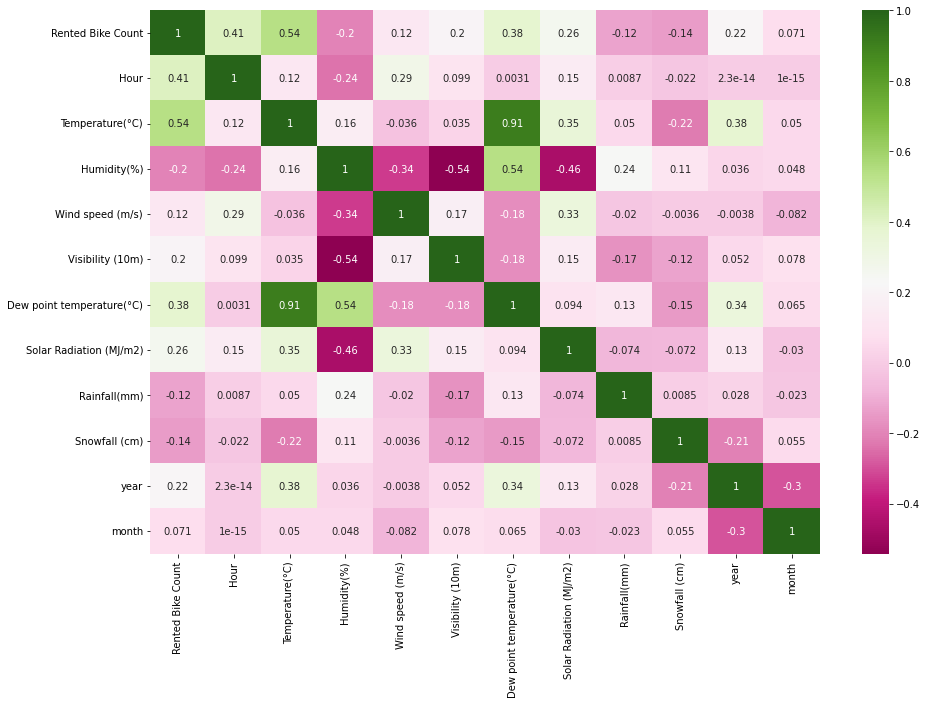

In [30]:
# Checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

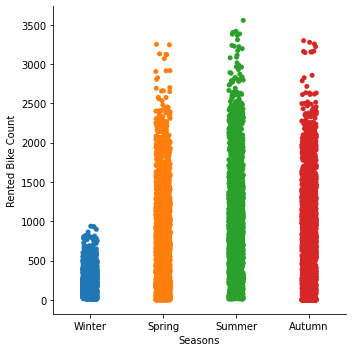

In [31]:
# Plotting cat plot for more info with season wise.
 
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

In [32]:
# On hourly basis rented bike count.

hour_wise = df.groupby('Hour').sum()['Rented Bike Count']
hour_wise

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

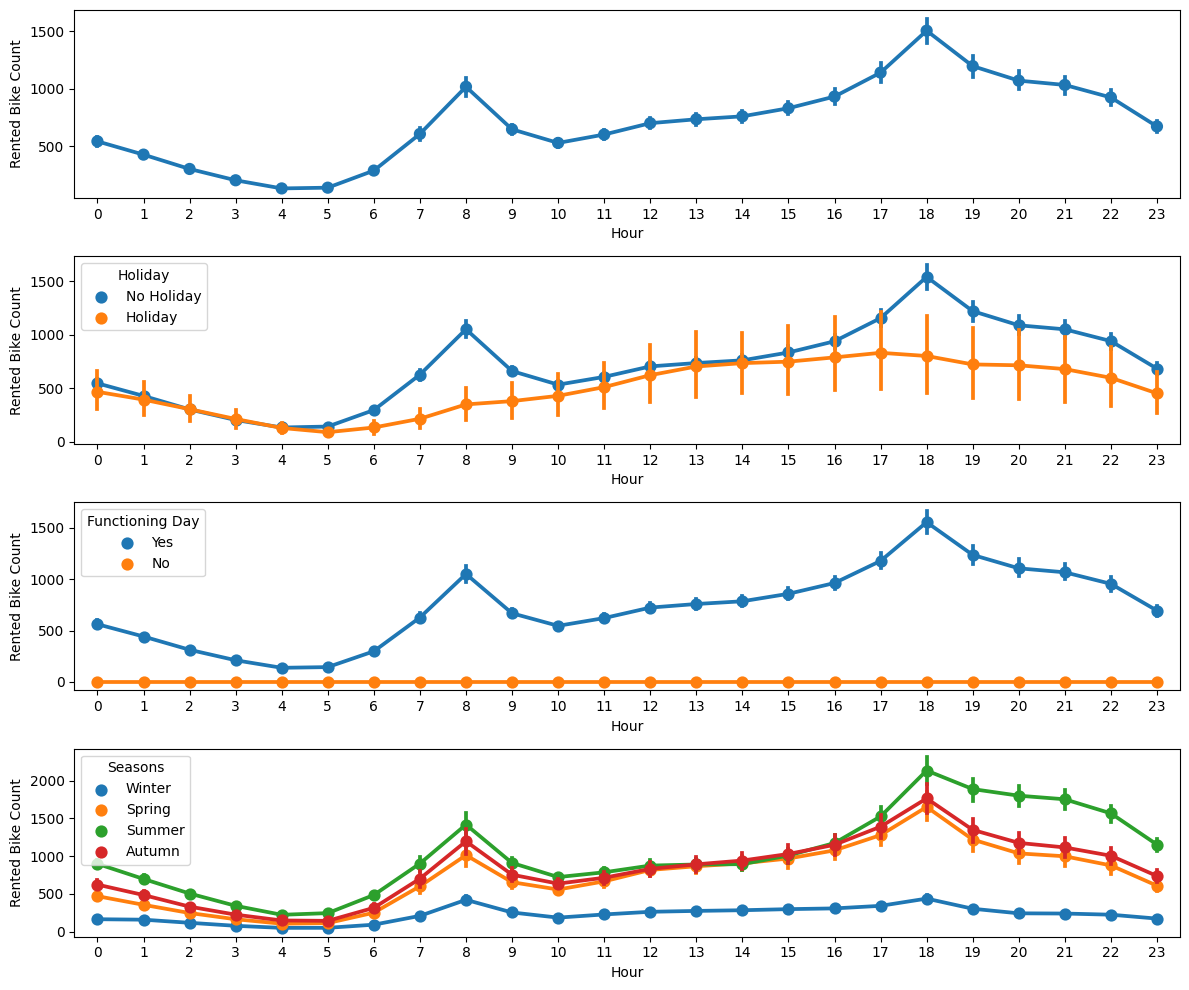

In [33]:
# Rented bike count as per hour,holidays,seasons,functional day.

fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

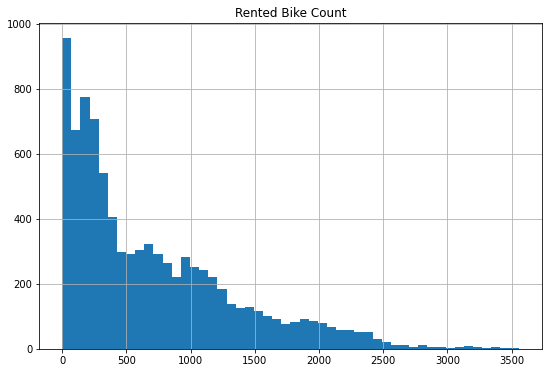

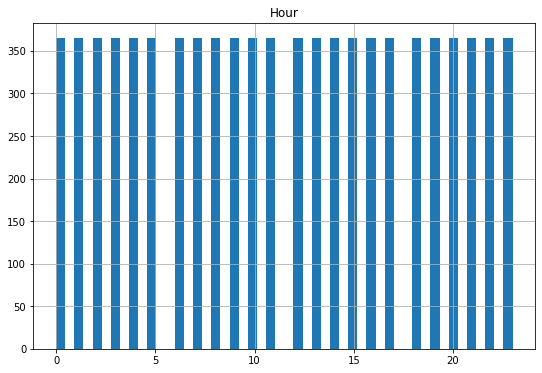

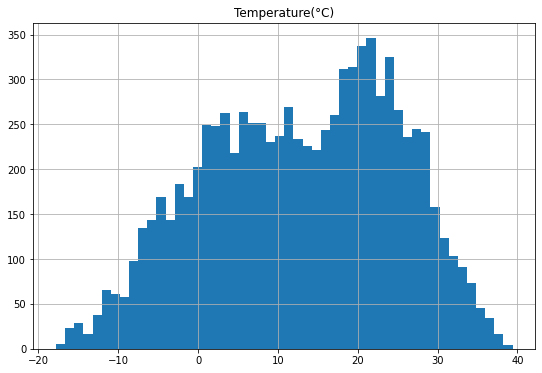

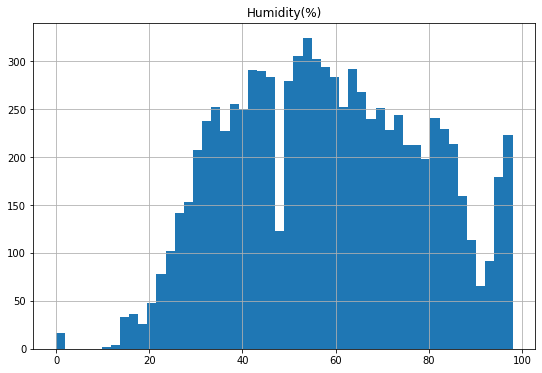

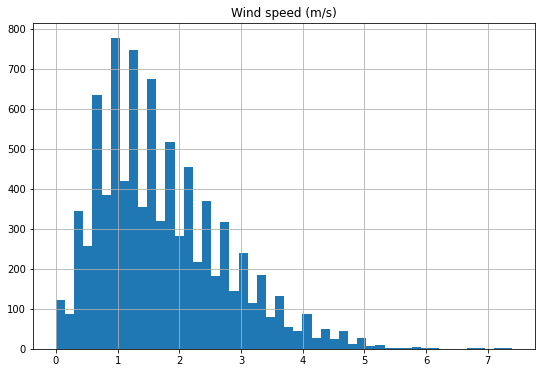

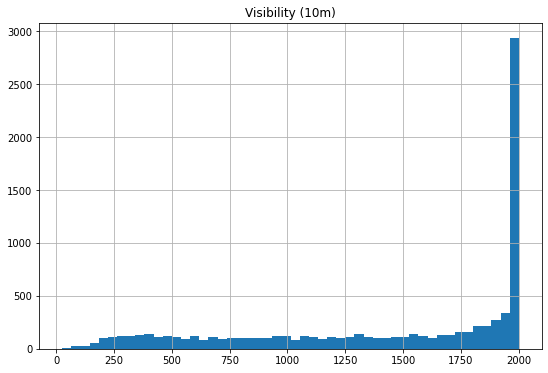

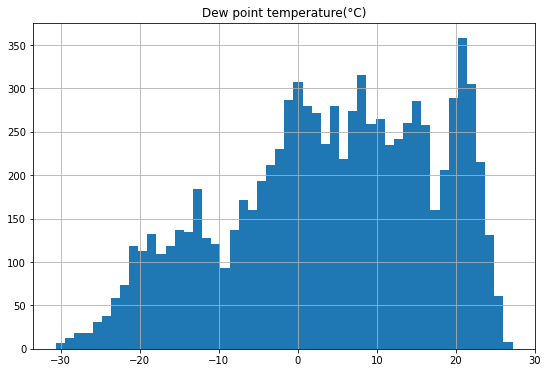

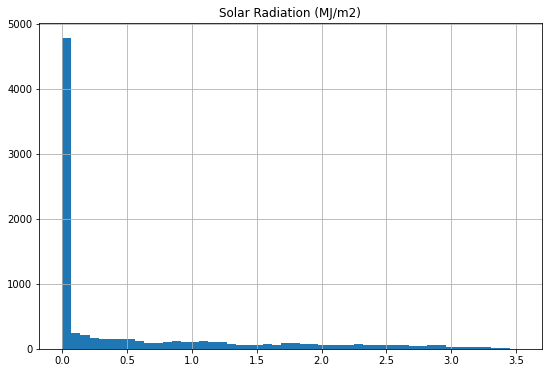

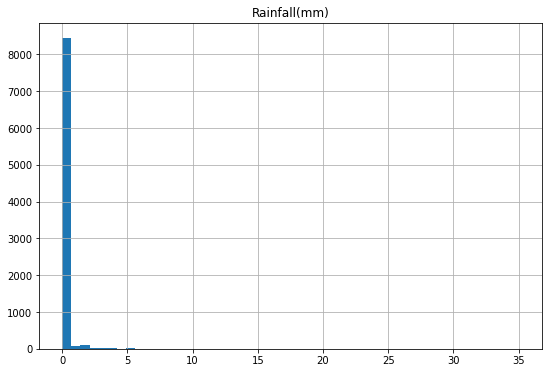

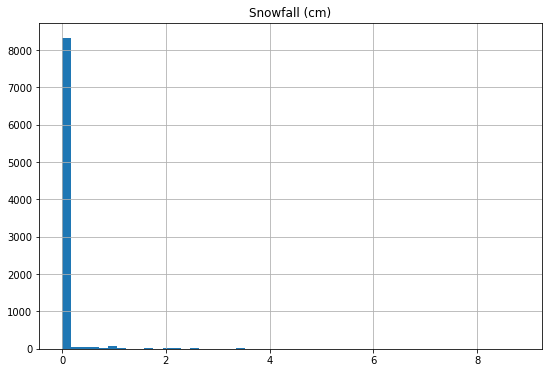

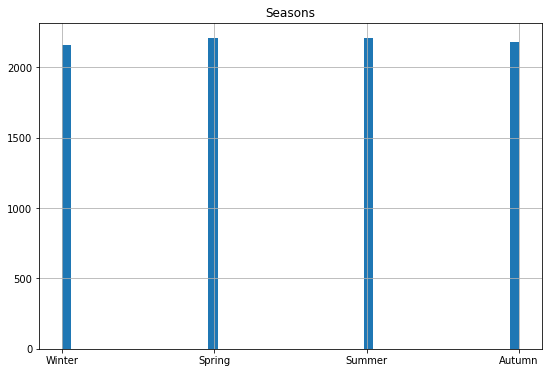

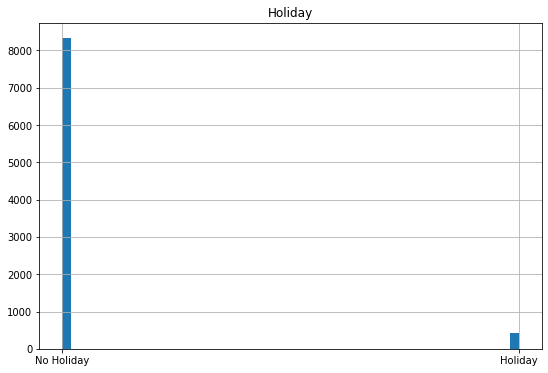

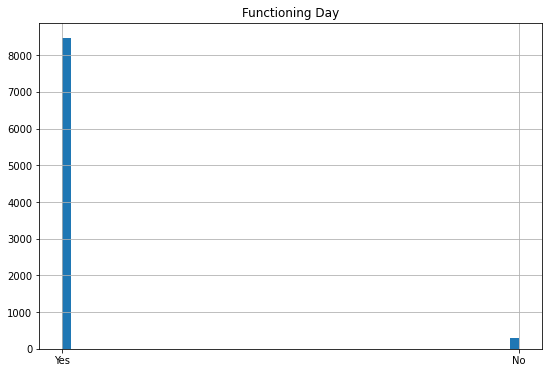

In [34]:
# Plotting the independent variables on the basis of dependent variables.
  
for col in column[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)   
    ax.set_title(col)
plt.show()


In [35]:
# Creating a dataframe containing the count of bikes rented in different intensities of rainfall.

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


# Data preparation

In [36]:
# Creating a dummy variables for the season column.

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'],axis=1,inplace=True)

In [37]:
# encoding 'Holiday' column with 0 and 1.

for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1  

In [38]:
# encoding 'Functioning Day' column with 0 and 1.

for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0 

In [39]:
# Taking the look for the data wheather the operation is placed or not.
 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


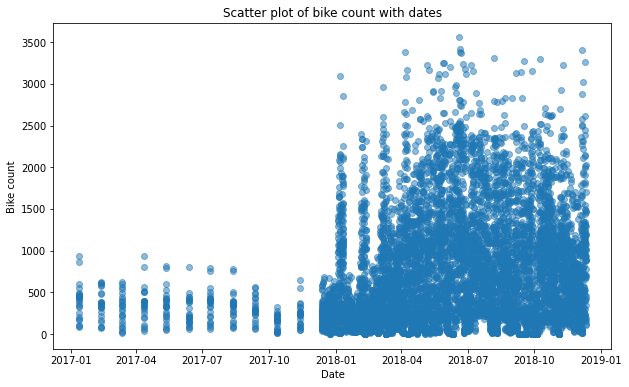

In [40]:
# scatter plot of bike count on differant dates.

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('Date')
plt.ylabel('Bike count')
plt.show()

In [41]:
# finding the inter-quartile range.
 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [42]:
# listing features to remove outliers.

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]

In [43]:
# printing the column for new features.

new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

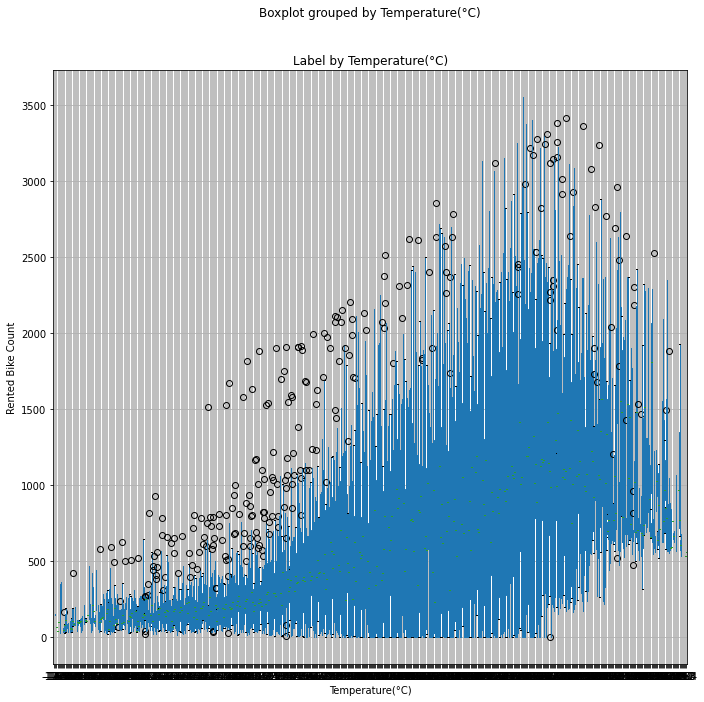

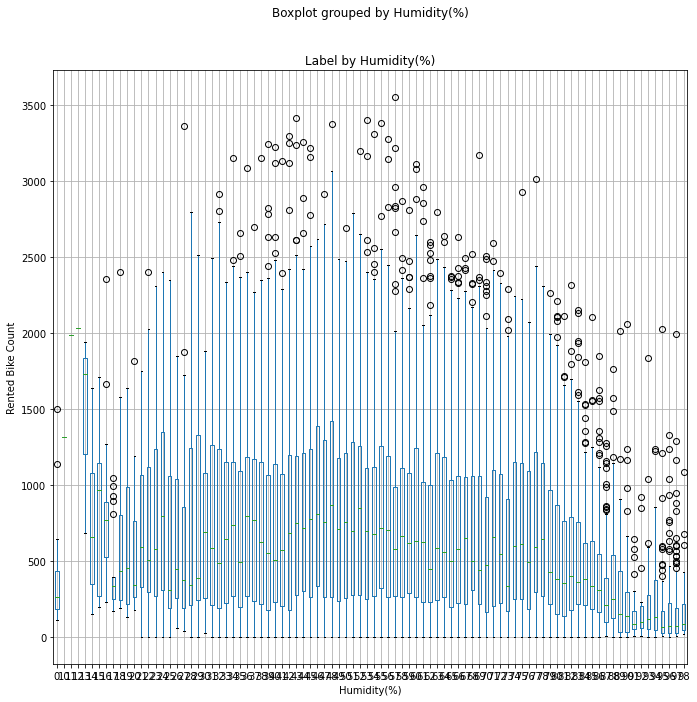

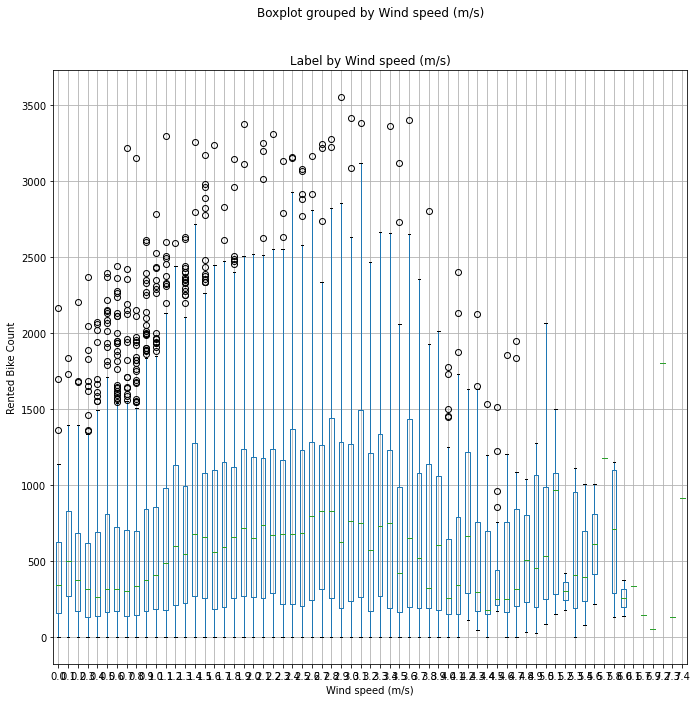

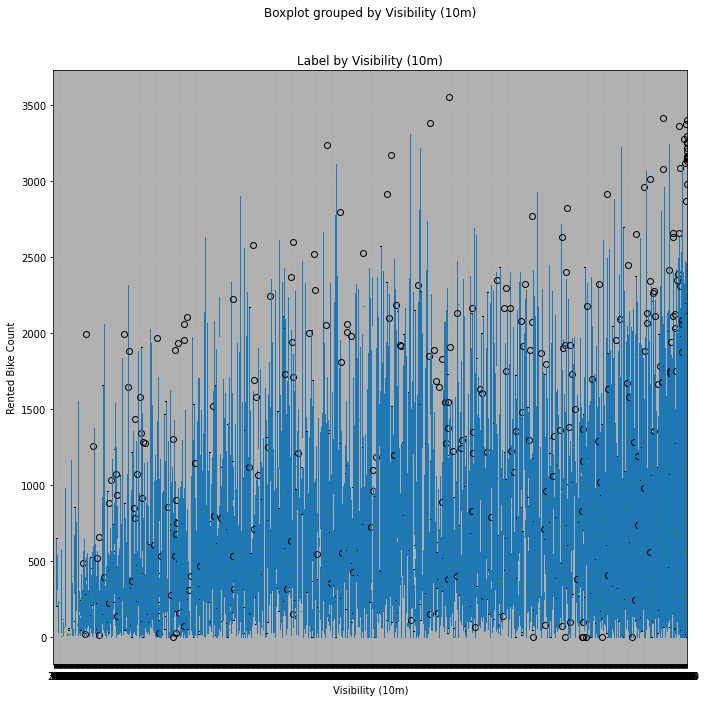

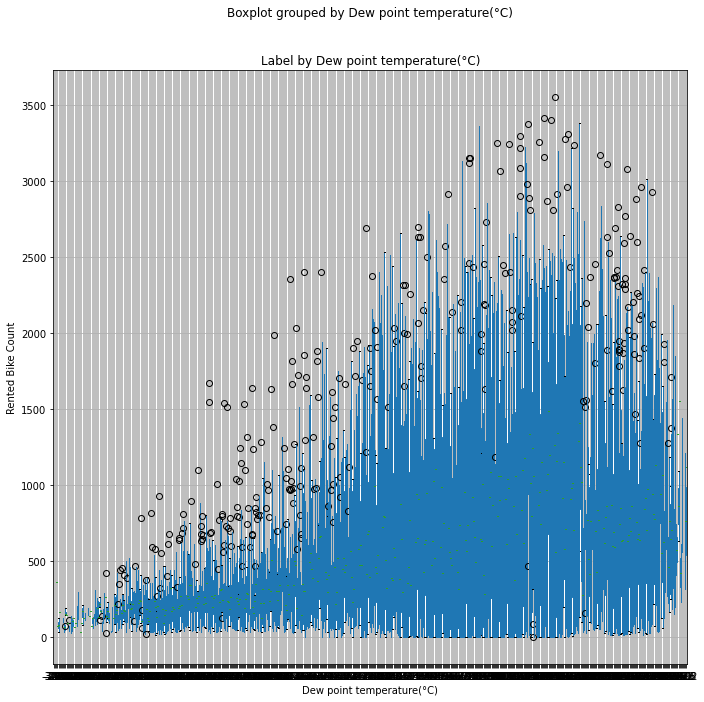

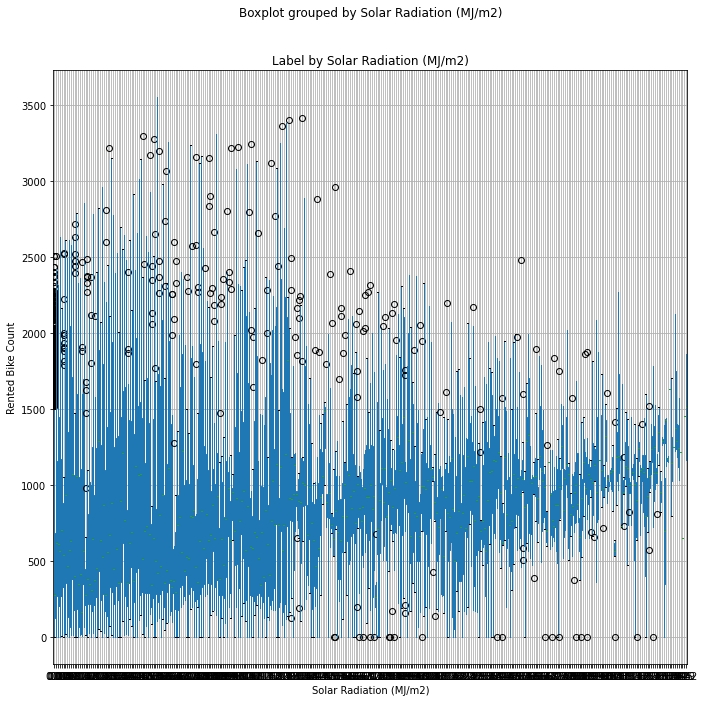

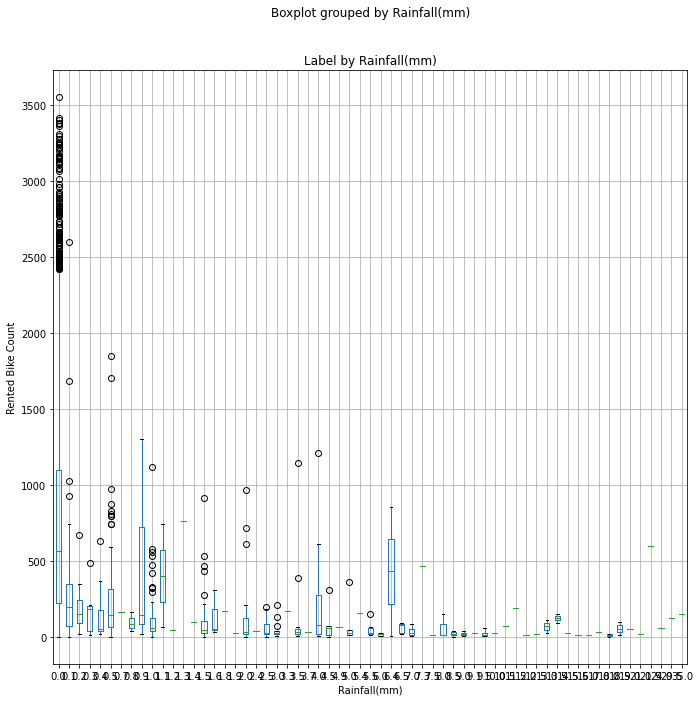

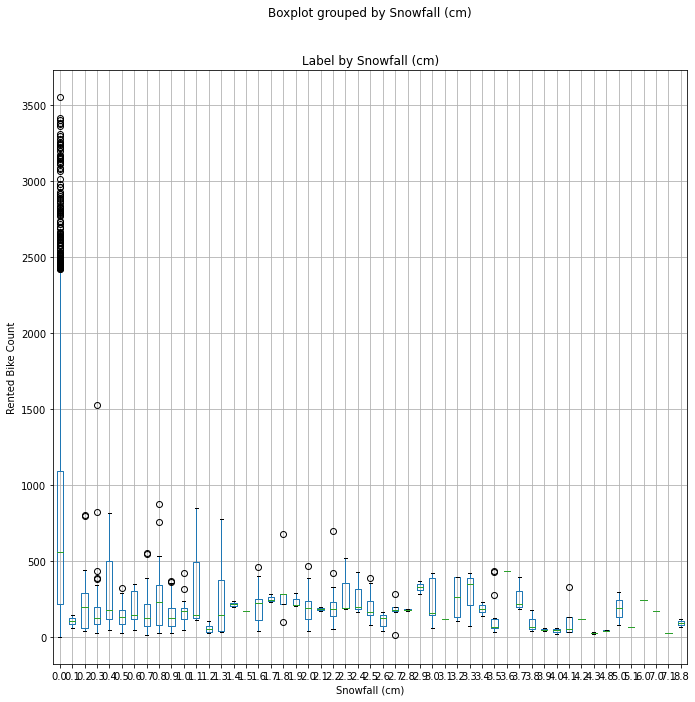

In [44]:
# Checking the outliers by plotting the box plote.

for col in new_features:
    fig = plt.figure(figsize=(11,11))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [45]:
# Finding the lower and the upper range of the outliers.

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |
                                      (df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
# checking the null value count after removing the uotliers.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

In [47]:
# filling null values with mean values.

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())

df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())

df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())

df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean()) 

df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())

df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

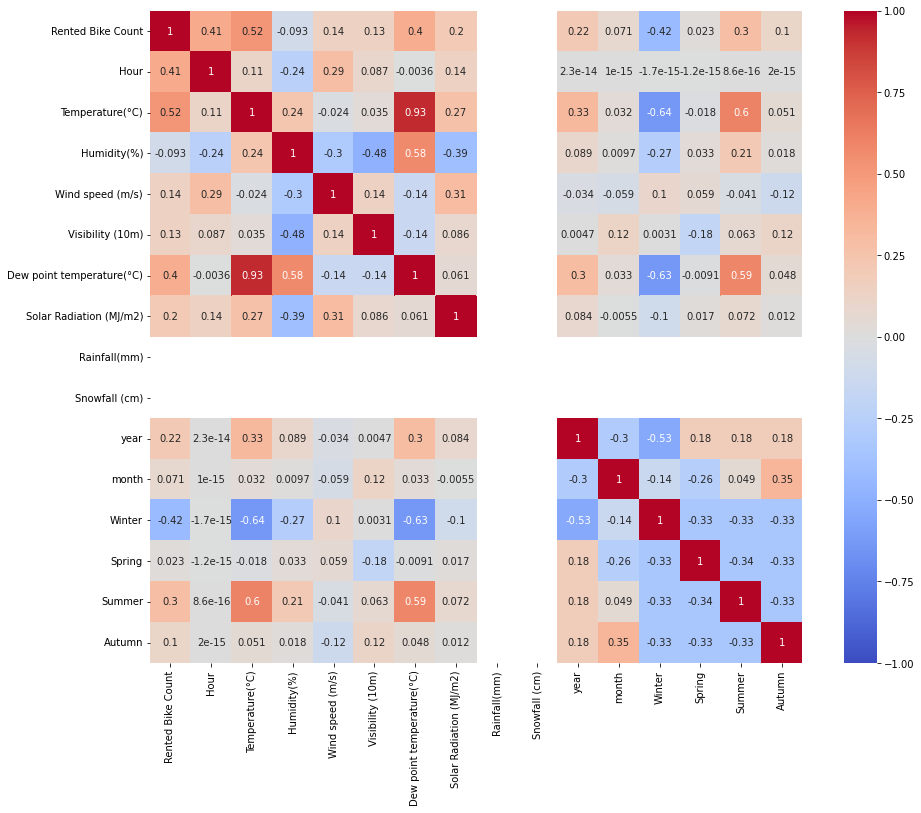

In [48]:
# checking correlation from heatmap.

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [49]:
# dropping columns with more (or less) correlation.

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

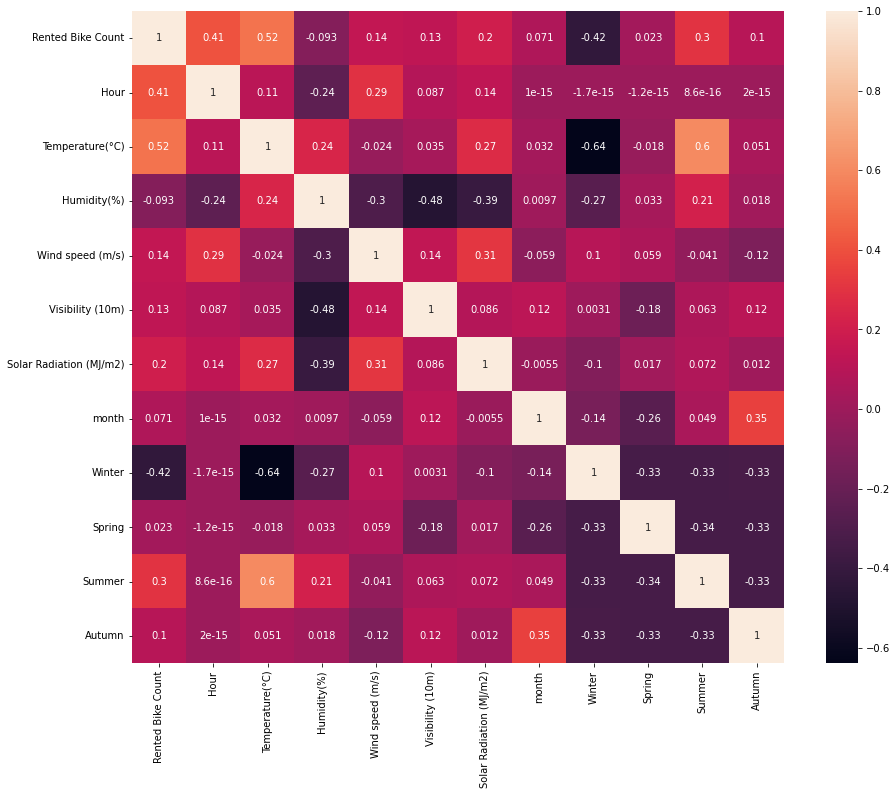

In [50]:
# extracting correlation heatmap.

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),annot=True, square=True)

In [51]:
# function to calculate Multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
# multicollinearity result.

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


In [53]:
# dropping "summer" column as it adds to multicollinearity.

df.drop(columns=['Summer'],axis=1,inplace=True)

In [54]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


In [55]:
# Taking a look at the data after dealing with outliers (filling the values with mean).

df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [56]:
# converting object type columns to float.

df['Functioning Day'] = df['Functioning Day'].astype(float)
df['Holiday'] = df['Holiday'].astype(float)

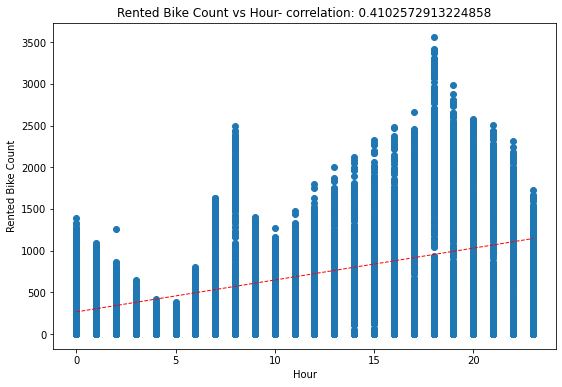

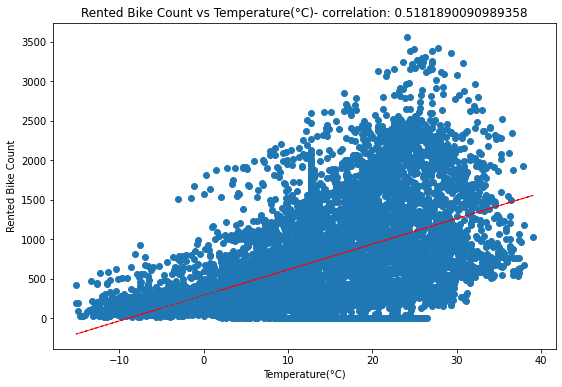

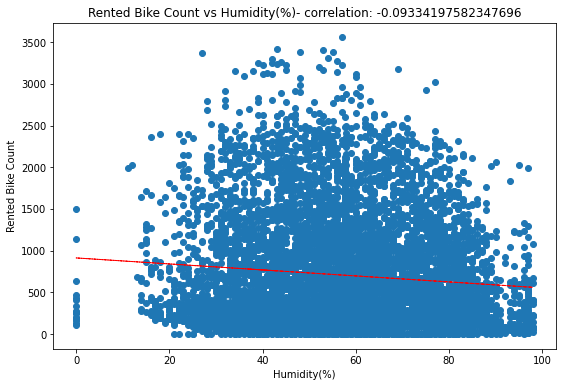

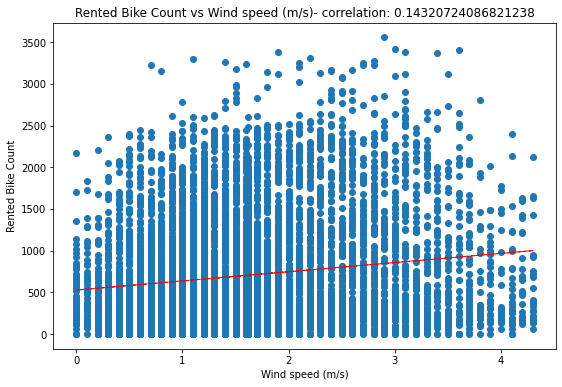

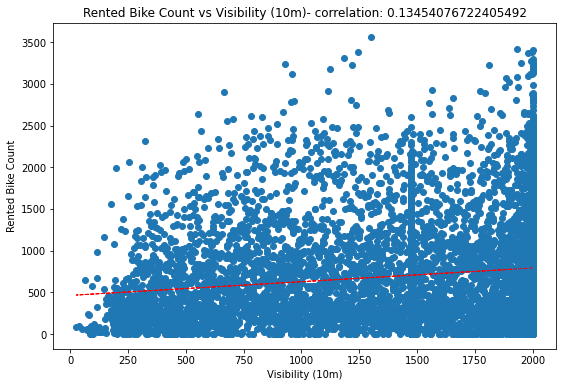

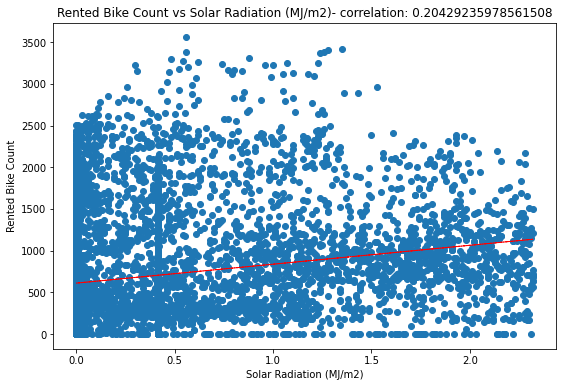

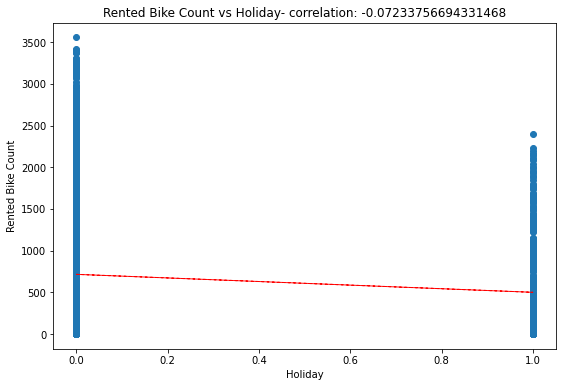

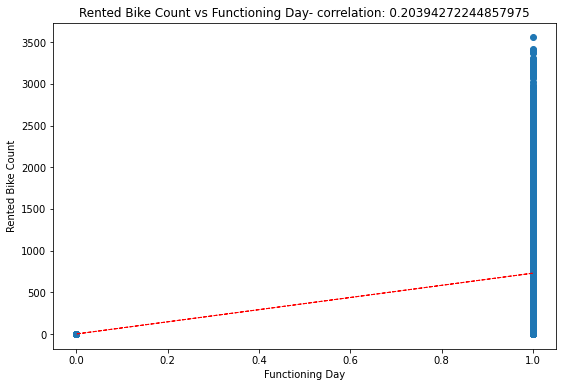

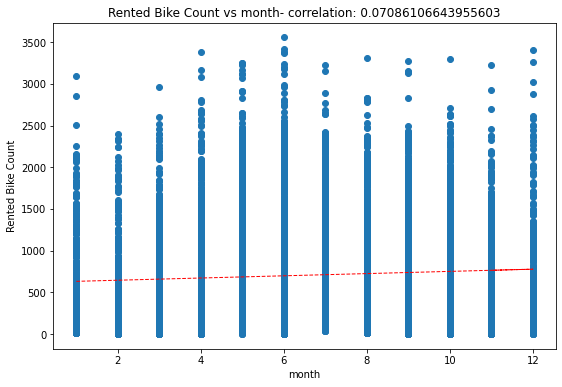

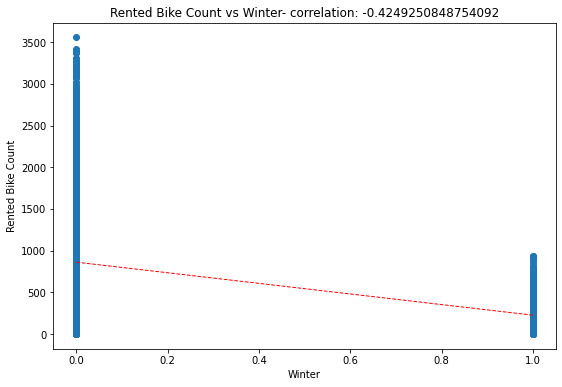

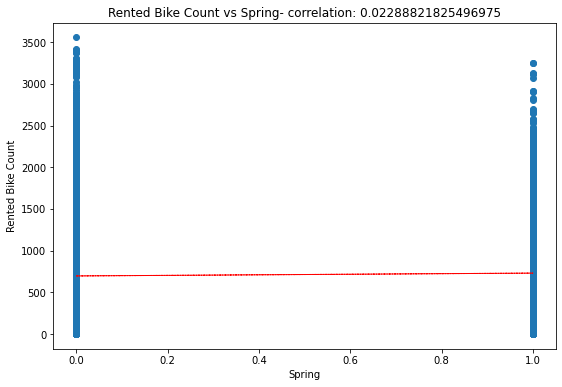

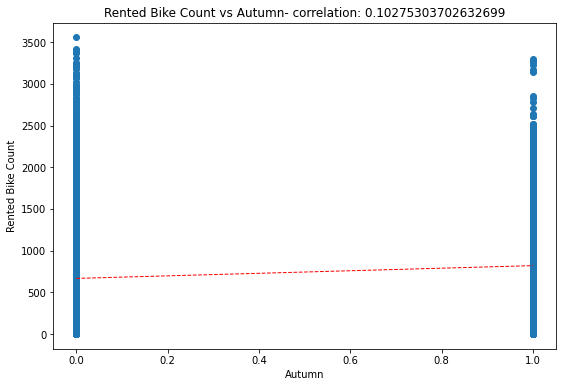

In [57]:
# obtaining correlation plots between dependent and independent variables.

numeric_features = df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [58]:
# Creating the data of independent variables.

Y = df['Rented Bike Count']

# Create the dependent variable data.

X = df.drop(columns=['Rented Bike Count'],axis=1).values
X

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [59]:
# Splitting the dataset into the Training set and Test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [60]:
# Transforming data.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression 

In [61]:
# Fitting Multiple Linear Regression to the Training set.

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [62]:
# Predicting the Train set results.

Y_pred_train = regressor.predict(X_train)

In [63]:
# Predicting the Test set results.

Y_pred_test = regressor.predict(X_test)

In [64]:
# r2 score of train set.

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [65]:
# R square for linear train.

r2_linear_train

0.5159573585193946

In [66]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [67]:
# different metrics used. 

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 213300.00835301352
RMSE : 461.8441385933284
R2 : 0.48805487953961213
Adjusted R2 :  0.4845221932569642


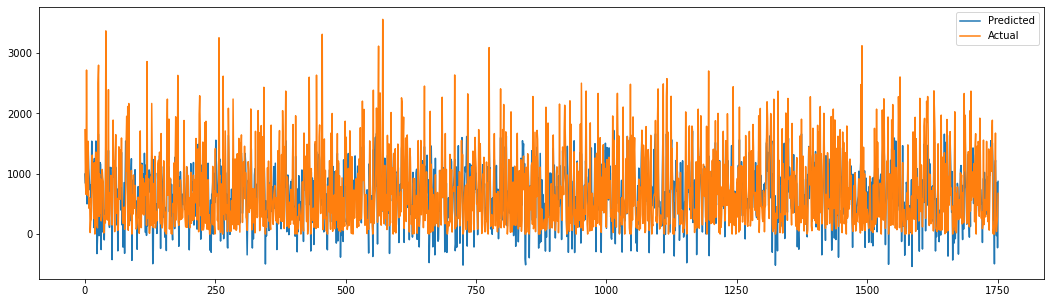

In [68]:
# plotting results from above model.

plt.figure(figsize=(18,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#Ridge regression 

In [69]:
# Training model.

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [70]:
# Getting best parameters.

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -201979.77851009383


In [71]:

Y_pred_ridge = ridge_regressor.predict(X_test)

In [72]:
# evaluating metrics.

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 213299.99590594516
RMSE : 461.8441251179289
R2 : 0.48805490941404095
Adjusted R2 :  0.484522223337542


# Decision-tree model

In [73]:
# training model.

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [74]:
# extracting best parameters.

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7751415215036551 with max depth 10


The best R2 test score is : 0.7711074920532334 with max depth = 10


# Random forest regression model

In [75]:
# training model.

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)

In [76]:
print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")

The best Random Forest R2 train score is : 0.8321362361549388 with n estimators = 20, max depth : 20, min samples split : 2 and min samples leaf : 2


The best Random Forest R2 test score is : 0.804061111359843 with n estimators = 20, max depth : 20, min samples split : 2 and min samples leaf : 2
